<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

In [1]:
import pandas as pd
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# đọc file csv
df = pd.read_csv('Data/preproces_data.csv')

df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## **Câu hỏi: Thể loại nhạc nào có 'popularity' cao nhất?.**

- Lợi ích: Giúp ta biết được thể loại nhạc nào đang được ưu thích hay các thể loại nào đang bị kén người nghe.

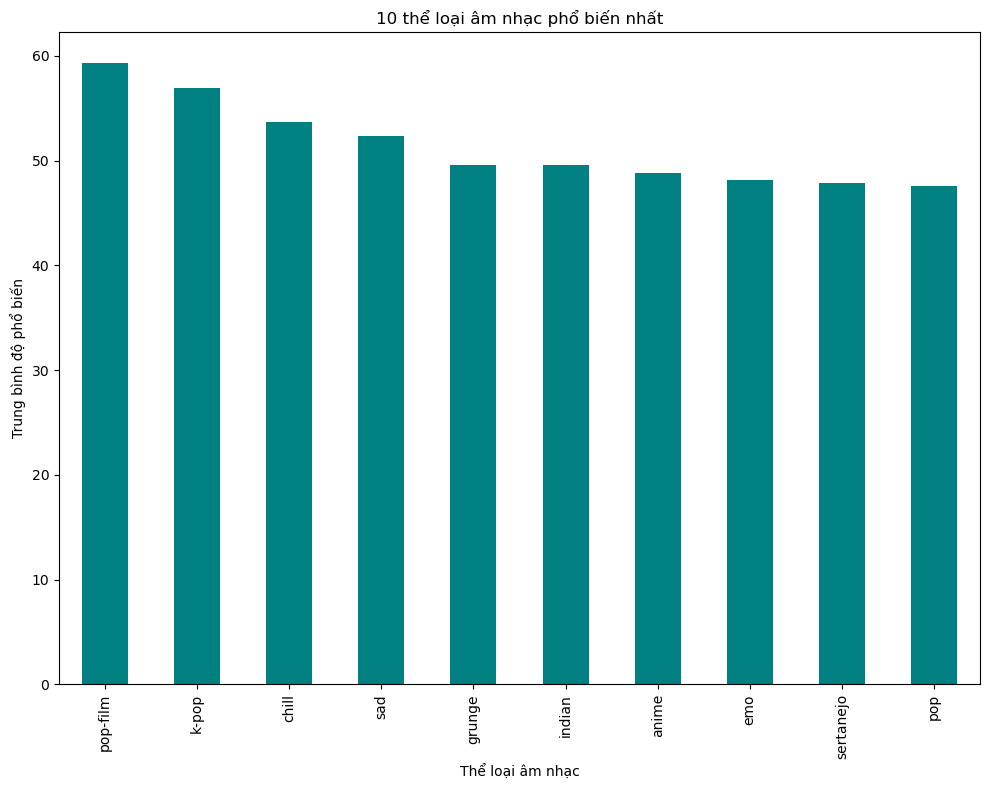

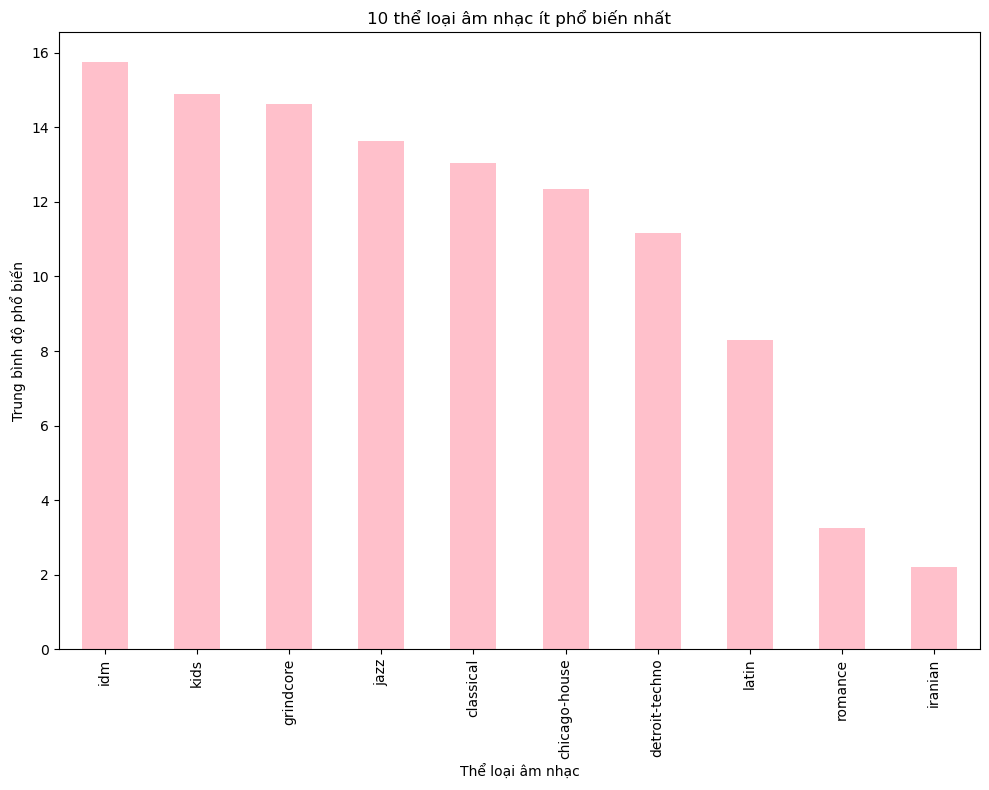

In [2]:
# Nhóm dữ liệu theo 'track_genre' và tính giá trị trung bình của 'popularity' cho mỗi thể loại
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

# Vẽ 10 thể loại âm nhạc phổ biến nhất
plt.figure(figsize=(10,8))
genre_popularity[:10].plot(kind='bar', color='teal')
plt.title('10 thể loại âm nhạc phổ biến nhất')
plt.xlabel('Thể loại âm nhạc')
plt.ylabel('Trung bình độ phổ biến')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Vẽ 10 thể loại âm nhạc ít phổ biến nhất
plt.figure(figsize=(10,8))
genre_popularity[-10:].plot(kind='bar', color='pink')
plt.title('10 thể loại âm nhạc ít phổ biến nhất')
plt.xlabel('Thể loại âm nhạc')
plt.ylabel('Trung bình độ phổ biến')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Câu hỏi: Mối quan hệ giữa các biến trong DataFrame?**

- **Từ các mối quan hệ đó xây dựng hướng đi để khám phá dữ liệu.**

- Lợi ích: Giúp nắm rõ các mối tương quan giữa các biến trong DataFrame.

/var/folders/7c/blssptt16fs931qs_zvg80c00000gn/T/ipykernel_71488/2902101000.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="Greens")


<Axes: >

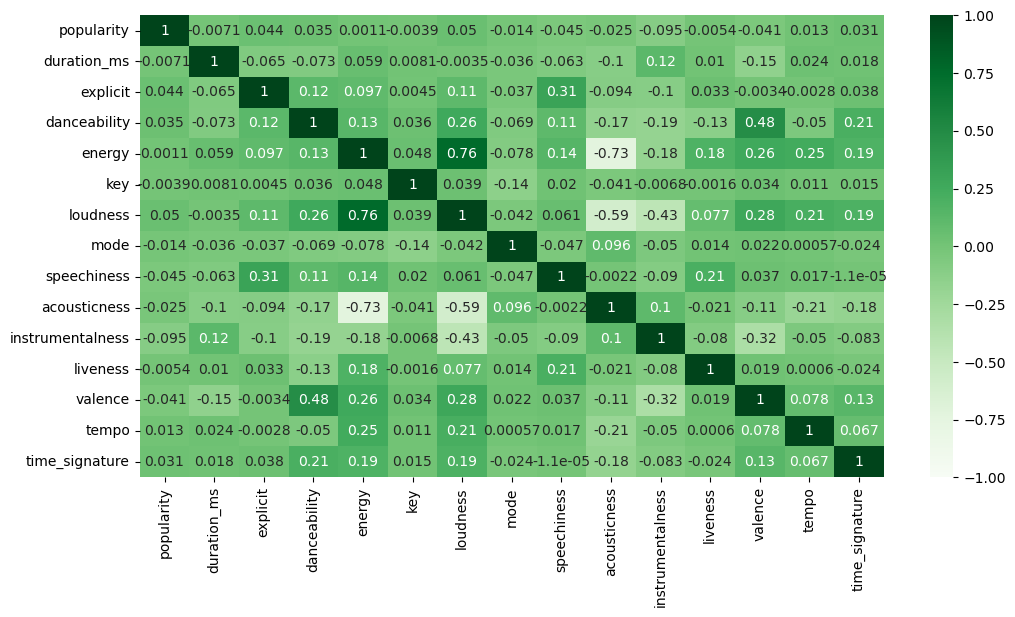

In [3]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="Greens")

- # **Tương Quan giữa các Đặc Trưng Âm Nhạc và Năng Lượng**


- Tương Quan Mạnh
    - Có một mối tương quan mạnh và tích cực giữa 'energy' và 'loudness' với hệ số tương quan khoảng 0.76. Kết quả này cho thấy khi giá trị 'loudness' tăng, 'energy' cũng tăng theo.
    - 'acousticness' có mối tương quan mạnh và tiêu cực với 'energy' (khoảng -0.73), có thể chỉ ra rằng các bản nhạc có tính âm học cao thường có năng lượng thấp hơn.

- Tương Quan Yếu
    - Các đặc trưng như 'popularity', 'duration_ms', 'key', 'mode', và 'time_signature' có mối tương quan yếu với 'energy', ngụ ý rằng chúng không đóng vai trò lớn trong việc dự đoán 'energy' của bản nhạc.

- Mối Quan Hệ Khác
    - 'danceability' và 'valence' có mối tương quan tích cực với 'energy' (khoảng 0.13 và 0.26). Điều này cho thấy bài hát dễ nhảy và có tính cảm xúc tích cực thường có năng lượng cao hơn.
    - 'speechiness' có mối tương quan vừa phải và tích cực với 'energy' (khoảng 0.14), có thể chỉ ra rằng các bản nhạc có nhiều lời nói hơn có thể có năng lượng cao hơn một chút.

- Không Có Tương Quan Đáng Kể
    - 'tempo' và 'time_signature' không có tương quan rõ ràng với 'energy', chỉ ra rằng tốc độ bài hát và số lượng nhịp trong một phách không có ảnh hưởng lớn đến năng lượng của bản nhạc.


## **Mối tương quan giữa energy và loudness.**

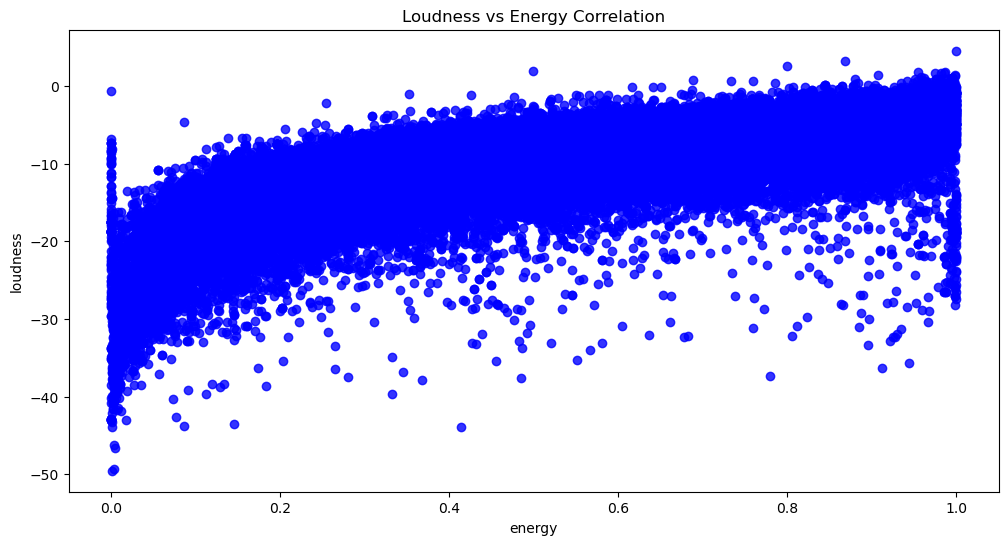

In [4]:
# vẽ mối quan hệ giữa các energy và loudness có mối quan hệ tuyến tính
plt.figure(figsize=(12, 6))
sns.regplot(x="energy", y="loudness", data=df, color='b').set(title='Loudness vs Energy Correlation')
plt.show()

- ## **Phân tích Biểu đồ Phân tán giữa Loudness và Energy**

- Tương quan tích cực
    - Có một mối quan hệ tương quan tích cực giữa 'loudness' và 'energy', nghĩa là khi 'loudness' tăng, 'energy' cũng có xu hướng tăng. Điều này được phản ánh qua việc các điểm dữ liệu tập trung nhiều hơn ở phía trên bên phải của biểu đồ.

- Phân phối của Loudness
    - 'Loudness' có phân phối rất rộng, từ giá trị rất âm đến gần 0. Điều này cho thấy có một số bản nhạc với 'loudness' rất thấp, điều này có thể liên quan đến các thuộc tính âm nhạc khác không được biểu đồ hiển thị.

- Các giá trị cực đoan của Energy
    - Có một số bản nhạc có 'energy' rất cao, gần với giá trị 1, không phụ thuộc vào 'loudness' của chúng.

- Nhiều giá trị nằm ở mức Loudness cao
    - Khoảng 'loudness' từ -20 đến 0 có số lượng điểm dữ liệu dày đặc hơn, cho thấy đây là phạm vi loudness phổ biến cho các bản nhạc trong tập dữ liệu.

- Outliers
    - Có một số điểm dữ liệu nằm ngoài phạm vi chung (outliers), đặc biệt là ở phía 'loudness' thấp, cho thấy có một số bản nhạc với 'loudness' rất thấp nhưng có 'energy' ở các mức khác nhau, từ thấp đến cao.


## **Câu hỏi: Có thể xác định thể loại nhạc dựa trên mức độ lớn của bản nhạc không? Từ đó có thể xác định độ phổ biến của các thể loại nhạc đó như thế nào và chúng có mối quan hệ nào với mức độ lớn không?**

Mục Đích:

- **Phân tích mối quan hệ giữa mức độ lớn với thể loại nhạc:** Để xác định liệu có thể sử dụng mức độ lớn (loudness) của bản nhạc như một dấu hiệu dự đoán thể loại nhạc hay không?
    
- **Đánh giá độ phổ biến:** Dựa vào mức độ lớn (loudness) ta có xem với độ lớn đó thì thể loại nào đang được nhiều người yêu thích và phổ biến nhất.

Ý Nghĩa:

- **Ứng dụng cho âm nhạc:** Có thể ứng dụng trong việc phát triển sản phẩm, chiến lược tiếp thị và nghiên cứu thị trường, giúp các công ty âm nhạc và nghệ sĩ hiểu và đáp ứng tốt hơn nhu cầu của khán giả.

- ## **Bước 1: Kiểm tra số lượng mẫu.**

In [5]:
# số thể loại nhạc trong bộ dữ liệu
df['track_genre'].value_counts()

acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: track_genre, Length: 114, dtype: int64

- ## **Bước 2: Tính mean của "loudness"**

In [6]:
# groupby track_genre và tính mean của loudness
genre_loudness_mean = df.groupby('track_genre')['loudness'].mean()

pd.DataFrame(genre_loudness_mean)

,loudness
track_genre,
acoustic,-9.447843
afrobeat,-7.789353
alt-rock,-6.191489
alternative,-6.078777
ambient,-18.601365
...,...
techno,-8.077874
trance,-6.329711
trip-hop,-9.239915


- ## **Bước 3: Ước lượng khoảng tin cậy cho "loudness"**

### Tính số lượng mẫu cho mỗi thể loại nhạc

- Lọc ra các thể loại có bao nhiêu bài hát

### Tính độ lệch chuẩn của mỗi thể loại nhạc

### Tính khoảng tin cậy dựa trên độ lệch chuẩn của tổng mẫu

In [7]:
# Thiết lập mức tin cậy (95%)
confidence_level = 0.95
Z = norm.ppf((1 + confidence_level) / 2)  

# Tính số lượng mẫu cho mỗi thể loại nhạc
n = df['track_genre'].value_counts()

# Tính độ lệch chuẩn của mỗi thể loại nhạc
genre_std_dev = df.groupby('track_genre')['loudness'].std()

# Tính độ lệch mẫu của mỗi thể loại nhạc
margin_of_error = Z * (genre_std_dev / np.sqrt(n))

# Tính khoảng tin cậy
confidence_interval = pd.concat([genre_loudness_mean - margin_of_error, genre_loudness_mean + margin_of_error], axis=1)
confidence_interval.columns = ['Lower', 'Upper']
confidence_interval

,Lower,Upper
track_genre,,
acoustic,-9.681722,-9.213964
afrobeat,-7.958446,-7.620260
alt-rock,-6.336639,-6.046339
alternative,-6.223841,-5.933713
ambient,-19.098416,-18.104314
...,...,...
techno,-8.267578,-7.888170
trance,-6.456719,-6.202703
trip-hop,-9.427008,-9.052822


## **Visualize 10 nhóm đầu tiên**
- Lọc và vẽ ra 10 giá trị của khoảng tin cậy của thể loại nhạc đầu tiên

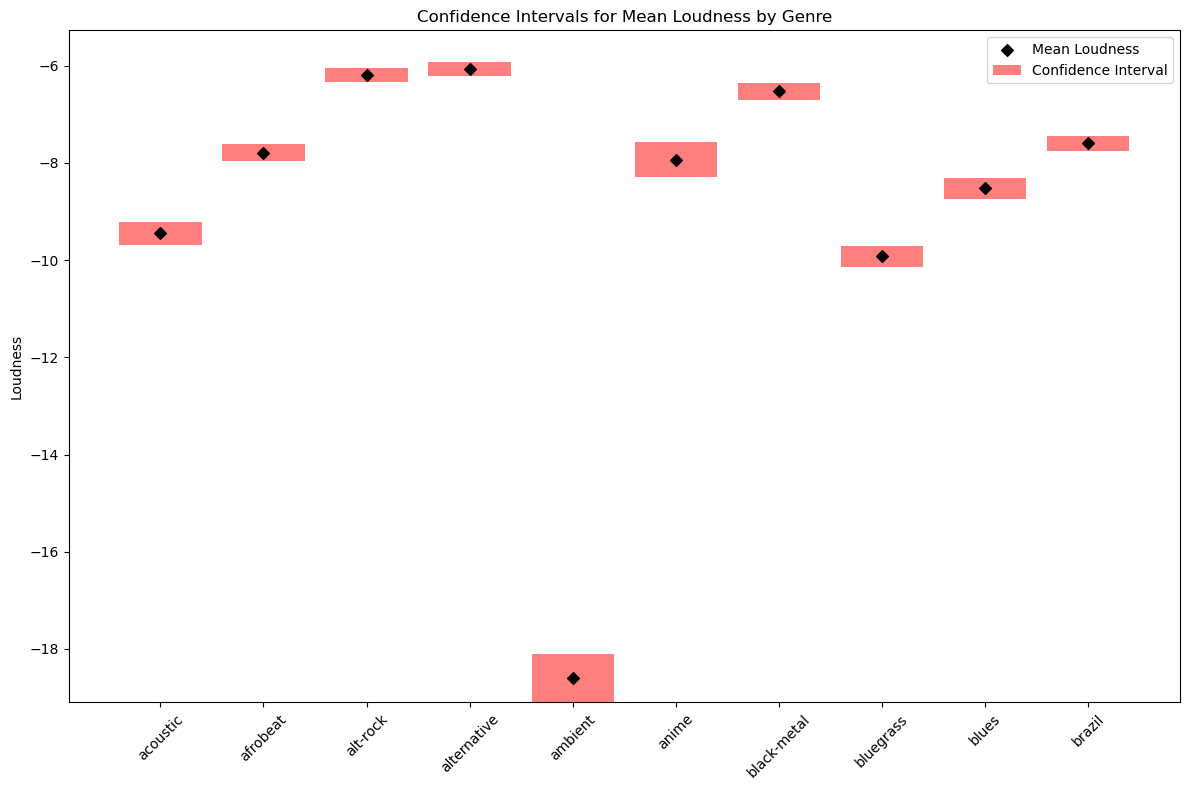

In [8]:
sample_confidence_interval = confidence_interval.head(10)

# Tạo biểu đồ cải tiến
plt.figure(figsize=(12, 8))

# Biểu đồ cột cho trung bình độ lớn
plt.bar(sample_confidence_interval.index, sample_confidence_interval['Upper'] - sample_confidence_interval['Lower'], 
        bottom=sample_confidence_interval['Lower'], color='red', alpha=0.5, label='Confidence Interval')

# Đánh dấu trung bình độ lớn
plt.scatter(sample_confidence_interval.index, genre_loudness_mean.head(10), color='black', marker='D', label='Mean Loudness')
plt.xticks(rotation=45)
plt.ylabel('Loudness')
plt.title('Confidence Intervals for Mean Loudness by Genre')
plt.legend()
plt.tight_layout()
plt.show()

- **Từ biểu đồ này ta có thể xác định được khoảng tin cậy của loudness.**

## **Bước 4: Xác định các thể loại nhạc.**


In [9]:
def predict_genre_base_on_estimates(loudness, confidence_intervals):
    # Xác định các thể loại nhạc phù hợp với giá trị 'loudness'
    possible_genres = [genre for genre, row in confidence_intervals.iterrows() if row['Lower'] <= loudness <= row['Upper']] 
    if len(possible_genres) == 0:
        return None 
    else:
        return possible_genres

# Sử dụng hàm
loudness_input = -6.2  # Giá trị loudness mẫu
possible_genres = predict_genre_base_on_estimates(loudness_input, confidence_interval)

# In kết quả
print(f"Với giá trị loudness là {loudness_input}, thể loại nhạc có thể là: ")
for genre in possible_genres:
    print(f"+ " + genre)


Với giá trị loudness là -6.2, thể loại nhạc có thể là: 
+ alt-rock
+ alternative
+ breakbeat
+ dancehall
+ dub
+ electro
+ grindcore
+ j-dance
+ j-pop
+ ska


## **Độ phổ biến của các thể loại nhạc này**

- Lọc ra các nhóm thể loại nằm trong khoảng tin cậy của loudness.
- Tính toán dựa trên popularity

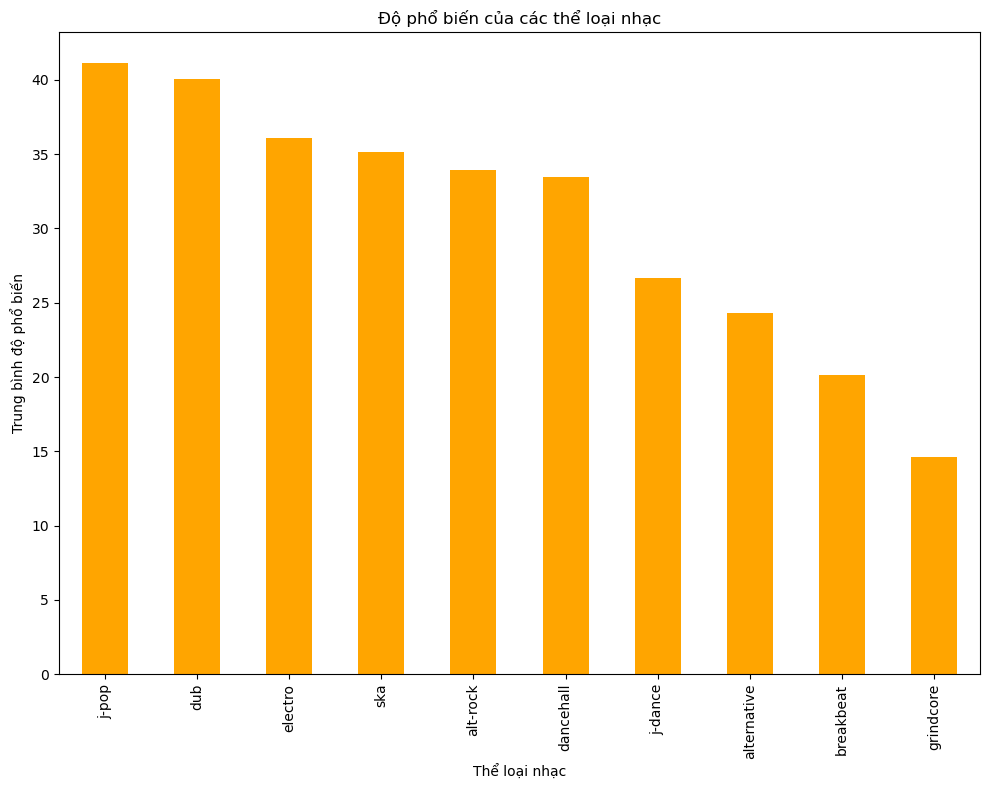

In [10]:
# Tính trung bình độ phổ biến của mỗi thể loại nhạc 
popularity_of_genres = df[df['track_genre'].isin(possible_genres)].groupby('track_genre')['popularity'].mean()

# Sắp xếp theo thứ tự giảm dần
popularity_of_genres.sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10,8))
popularity_of_genres.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Độ phổ biến của các thể loại nhạc')
plt.xlabel('Thể loại nhạc')
plt.ylabel('Trung bình độ phổ biến')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Từ biểu đồ ta có thể thấy đươc với cùng 1 mức độ âm thanh (loudness) có thể có nhiều thể loại nhạc khác nhau nhưng trong số đó ta có thể thấy được mức độ phổ biến của thể loại nhạc nào đang được ưu chuộng nhất.

- Và phần nào cũng giúp cho nền âm nhạc xác định được với mức âm thanh (loudness) này thì thể loại nào được mọi người thích nhất.

# **Phần muốn phát triển thêm nhưng chưa ổn:**


## **Bước 5: Xây dựng model dự đoán chính xác 1 thể loại nhạc.**

- Mục đích để dự đoán: dùng cột giá trị energy để xác định thể loại nếu có nhiều hơn 1 thể loại được dự đoán từ input loudness (dựa vào khoảng tin cậy của "loudness").

In [11]:
# Chuẩn bị dữ liệu cho hồi quy tuyến tính
X = df['loudness']  # Biến độc lập
y = df['energy']    # Biến phụ thuộc

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [12]:
def predict_genre_based_on_loudness_and_energy(loudness, model, df, confidence_intervals):
    # Dự đoán 'energy' từ 'loudness'
    predicted_energy = model.predict([[loudness]])[0]
    print(f"- Giá trị energy dự đoán từ model: {predicted_energy}")
    print()
    # Xác định các thể loại nhạc phù hợp với giá trị 'loudness'
    possible_genres = [genre for genre, row in confidence_intervals.iterrows() if row['Lower'] <= loudness <= row['Upper']]
    print(f"Các thể loại nhạc có thể là: ")
    for genre in possible_genres:
        print(f"+ {genre}")

    print()
    # Nếu có nhiều hơn một thể loại, chọn thể loại có giá trị trung bình 'energy' gần nhất với giá trị dự đoán
    if len(possible_genres) > 1:
        genre_energy_means = df.groupby('track_genre')['energy'].mean()
        closest_genre = min(possible_genres, key=lambda genre: abs(genre_energy_means[genre] - predicted_energy))
        return closest_genre
    elif possible_genres:
        return possible_genres[0]
    else:
        return "Unknown"

# Sử dụng hàm
loudness_input = -6.2  # Giá trị loudness mẫu
predicted_genre = predict_genre_based_on_loudness_and_energy(loudness_input, model, df, confidence_interval)

print(f"- Với giá trị loudness là {loudness_input}, thể loại nhạc có thể là: {predicted_genre}")

- Giá trị energy dự đoán từ model: 0.719816637535501

Các thể loại nhạc có thể là: 
+ alt-rock
+ alternative
+ breakbeat
+ dancehall
+ dub
+ electro
+ grindcore
+ j-dance
+ j-pop
+ ska

- Với giá trị loudness là -6.2, thể loại nhạc có thể là: alternative


# **Reflection**
1. **Bạn gặp khó khăn gì?** 
* Em đã gặp khó khăn mất khá nhiều thời gian để hiểu bộ data với ý nghĩa của từng cột thuộc tính.
* Bộ data chọn khá nhiều cột phải hiểu chuyên sâu về âm nhạc.
* Em muốn phát triển model để dựa đoán ra thể loại nhạc nhưng gặp khá nhiều câu hỏi đặt ra trong quá trình này.
    - Không biết có thể phát triển biến độc lập nhiều hơn nếu dựa trên khoảng tin cậy của loudness hay không ?
    - Model xây dựng có đúng không ?
    - Model có đang bị overfitting không ? 
    - Quá trình đưa vào dự đoán chỉ từ 1 cột sang 1 cột có đang bị mặc định quá không ? (1 -> 1 hay 3 -> 4)
* Không biết câu hỏi đặt ra có ổn chưa? Có hợp lí cho việc khám phá dữ liệu chưa ?
* Câu hỏi EDA có đánh vào lợi ích chưa ?
2. **Bạn đã học được những gì?** 
* Em đã học được hiểu các phương pháp xử lý vô số giá trị nhiễu có thể phát sinh trong quá trình trả lời câu hỏi.
* Mạnh dạn trao đổi với nhau đưa ra vấn đề và cùng nhau giải quyết vấn đề, cải thiện được việc hoạt động nhóm. Em chủ động hơn và đặt ra nhiều câu hỏi để hiểu rõ hơn về đề tài đang nghiên cứu.
* Cách giải quyết vấn đề nếu đang trong quá trình làm bài (có thể họp để hỏi ý kiện nhóm).
* Biết cách sử dụng Git và Github cũng như làm việc nhóm trên nền tảng này.


